In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd

file_path = '/content/drive/My Drive/hotel_service/data/train_0107_4.csv'
train = pd.read_csv(file_path, low_memory=False)

pd.set_option('display.max_columns', None)
train.head()

,accommodates,bathrooms,bed_type,bedrooms,beds,city,cleaning_fee,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,latitude,longitude,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,zipcode,y,num_top_amenities,host_experience_years,cancellation_policy_encoded,review_scores_rating_bucket,city_neighbourhood_avg_price
0,6,2.0,Real Bed,1.0,4.0,LA,t,t,f,2016-07-13,f,33.788931,-118.154761,Long Beach,1,Apartment,60.0,Private room,90804,138.0,4,9.4658,0,0,122.221328
1,2,1.0,Real Bed,1.0,1.0,DC,t,t,t,2015-12-30,f,38.934810,-76.978190,Brookland,9,House,100.0,Private room,20018,42.0,10,10.0027,2,2,144.558140
2,2,2.0,Real Bed,1.0,1.0,NYC,t,t,f,2016-05-21,t,40.695118,-73.926240,Bushwick,27,Apartment,83.0,Private room,11221,65.0,9,9.6110,2,2,81.804928
3,2,1.0,Real Bed,1.0,1.0,SF,t,t,t,2012-06-19,t,37.796728,-122.411906,Nob Hill,38,Apartment,95.0,Private room,94133,166.0,9,13.5315,2,2,210.928571
4,2,1.0,Real Bed,1.0,1.0,NYC,t,t,t,2015-03-25,f,40.785050,-73.974691,Upper West Side,5,Apartment,100.0,Entire home/apt,10024,165.0,10,10.7699,2,2,184.027348


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55583 entries, 0 to 55582
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accommodates                  55583 non-null  int64  
 1   bathrooms                     55436 non-null  float64
 2   bed_type                      55583 non-null  object 
 3   bedrooms                      55512 non-null  float64
 4   beds                          55487 non-null  float64
 5   city                          55583 non-null  object 
 6   cleaning_fee                  55583 non-null  object 
 7   host_has_profile_pic          55435 non-null  object 
 8   host_identity_verified        55435 non-null  object 
 9   host_since                    55435 non-null  object 
 10  instant_bookable              55583 non-null  object 
 11  latitude                      55583 non-null  float64
 12  longitude                     55583 non-null  float64
 13  n

### 1. 目的変数の分布を確認する

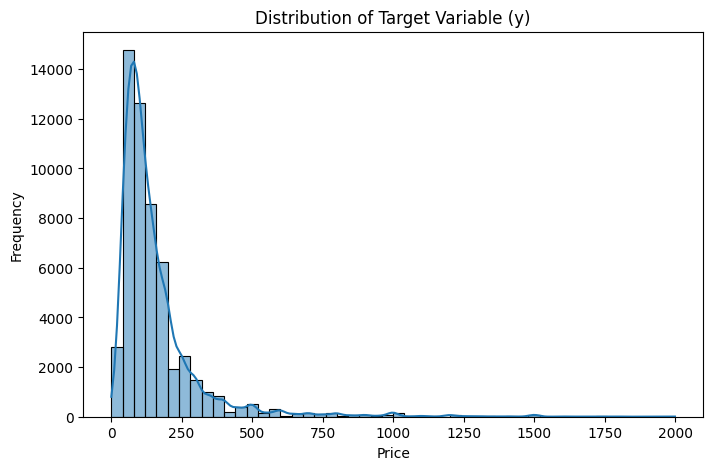

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# ターゲット変数のヒストグラム
plt.figure(figsize=(8, 5))
sns.histplot(train['y'], bins=50, kde=True)
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


### 2. 数値変数の統計情報を確認する

In [6]:
# 数値変数の統計情報
train.describe()


,accommodates,bathrooms,bedrooms,beds,latitude,longitude,number_of_reviews,review_scores_rating,y,description_length,num_top_amenities,host_since_days,cancellation_policy_encoded
count,55583.000000,55436.000000,55512.000000,55487.000000,55583.000000,55583.000000,55583.000000,43027.000000,55583.000000,55583.000000,55583.000000,55435.000000,55583.000000
mean,3.152906,1.236426,1.265312,1.711770,38.450812,-92.342406,20.937283,94.077928,160.163647,762.622960,7.895885,3822.787264,1.137218
std,2.153001,0.583074,0.849319,1.257822,3.080869,21.687844,37.951889,7.802154,168.087140,316.853083,2.015317,661.145621,0.854522
min,1.000000,0.000000,0.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,1.000000,1.000000,0.000000,2652.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,34.128205,-118.341876,1.000000,92.000000,74.000000,482.000000,7.000000,3305.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,40.663312,-76.995602,6.000000,96.000000,111.000000,1000.000000,8.000000,3753.000000,1.000000
75%,4.000000,1.000000,1.000000,2.000000,40.746146,-73.954703,23.000000,100.000000,185.000000,1000.000000,9.000000,4278.000000,2.000000
max,16.000000,8.000000,10.000000,18.000000,42.390437,-70.999166,605.000000,100.000000,1999.000000,1000.000000,11.000000,6154.000000,4.000000


### 3. 数値変数の相関を可視化する

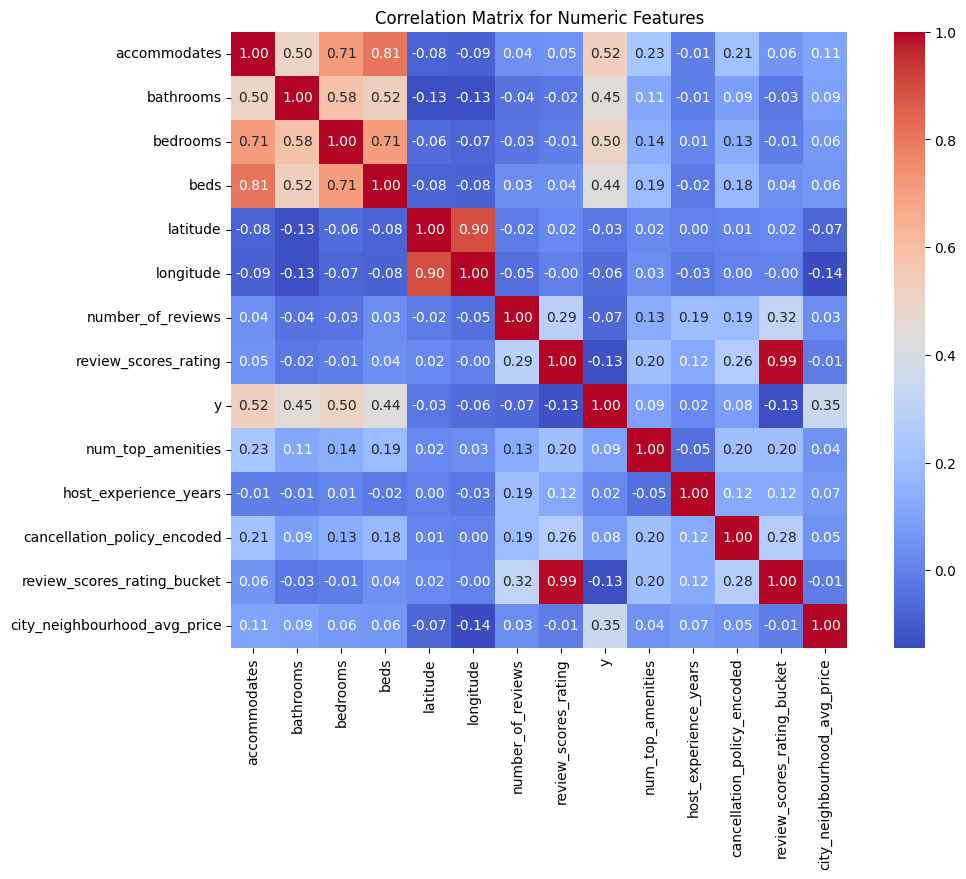

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 数値変数のみを抽出
numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns

# 欠損値を一時的に補完（相関計算のため、補完の方針は別途確認要）
train_numeric = train[numeric_cols].fillna(0)

# 相関行列の計算
corr_matrix = train_numeric.corr()

# ヒートマップの可視化
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True)
plt.title('Correlation Matrix for Numeric Features')
plt.show()


### 数値変数と目的変数の関係を確認する

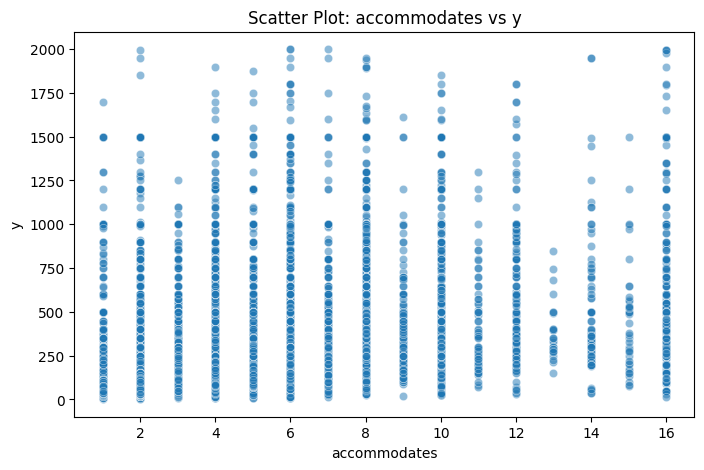

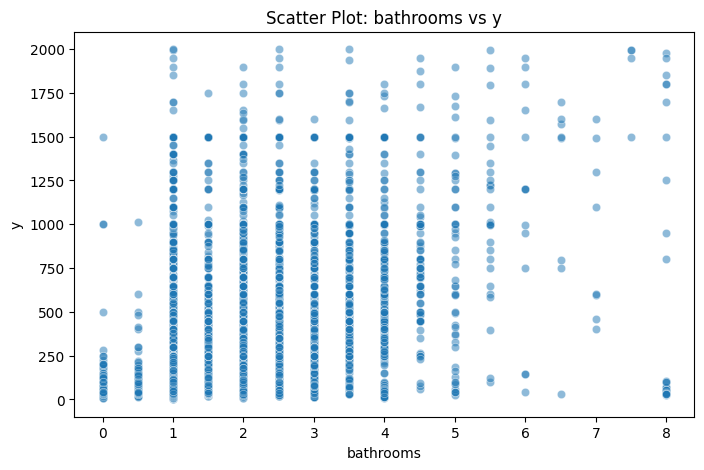

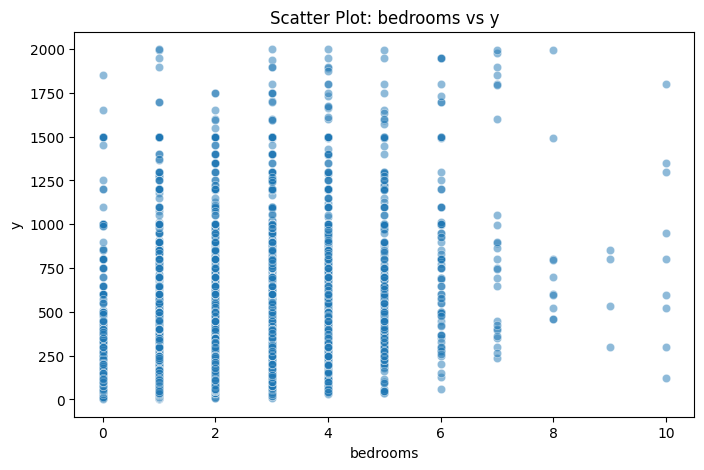

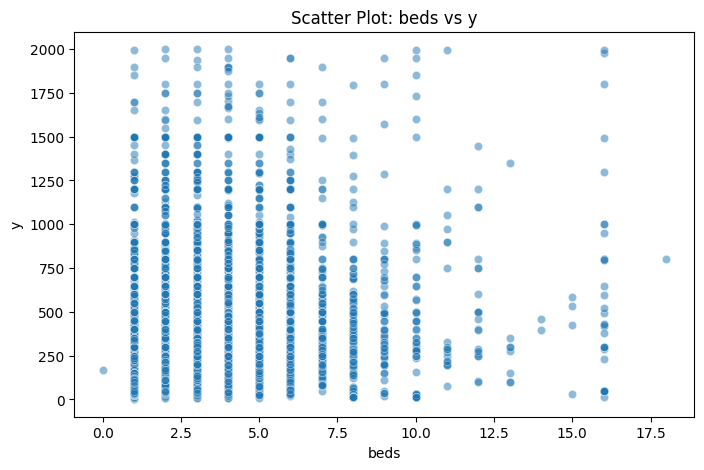

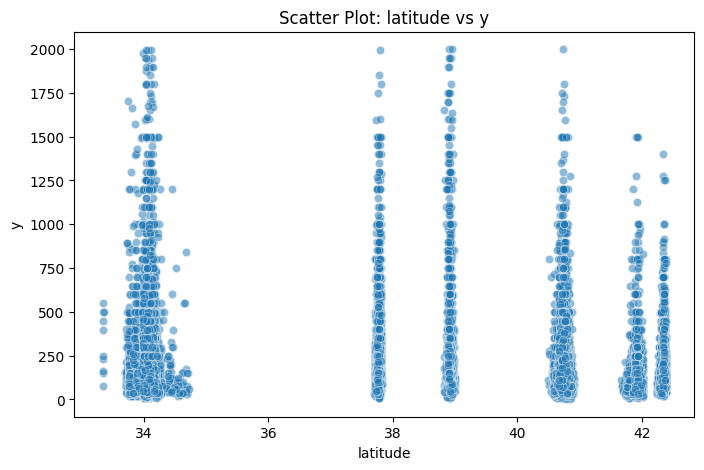

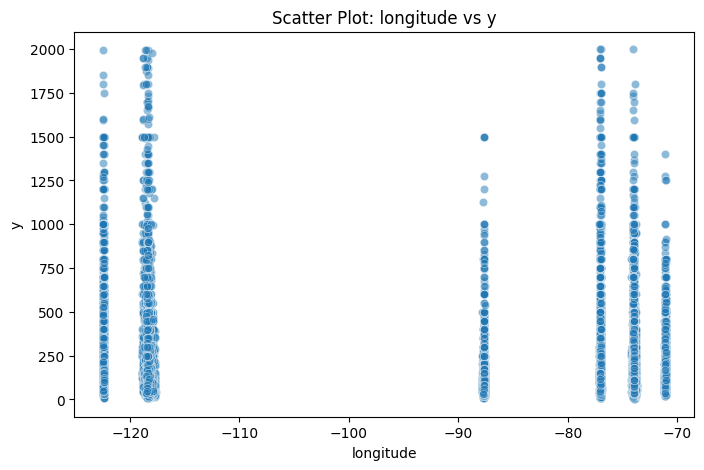

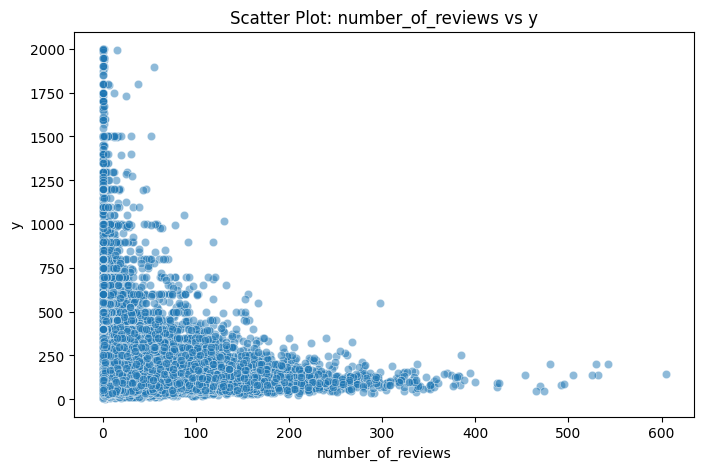

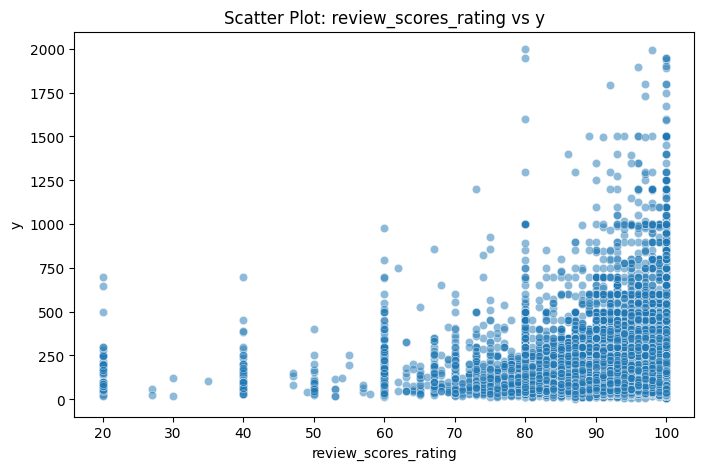

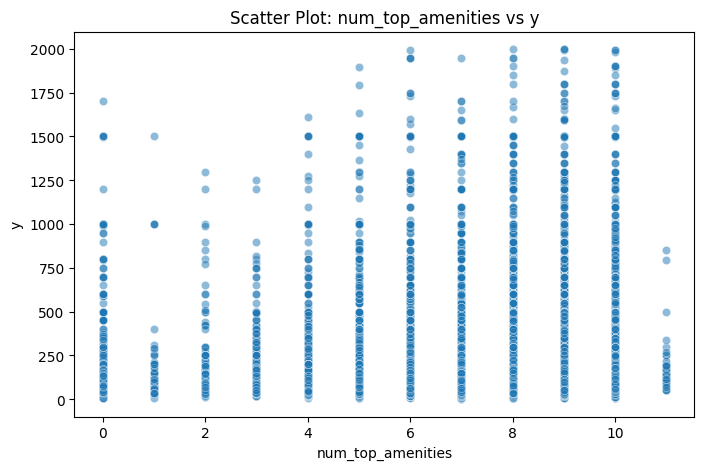

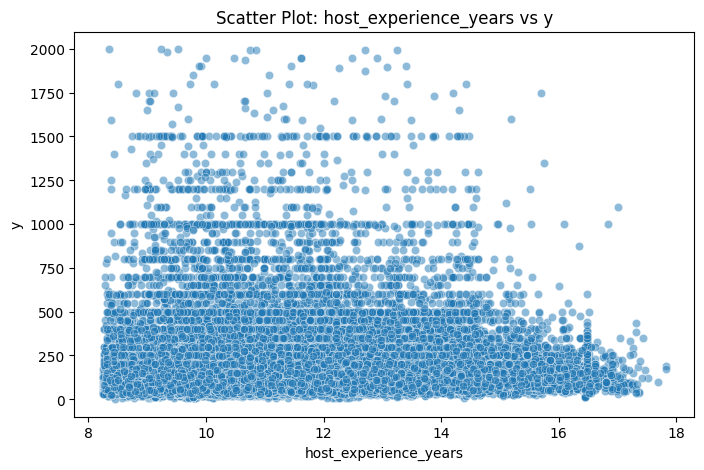

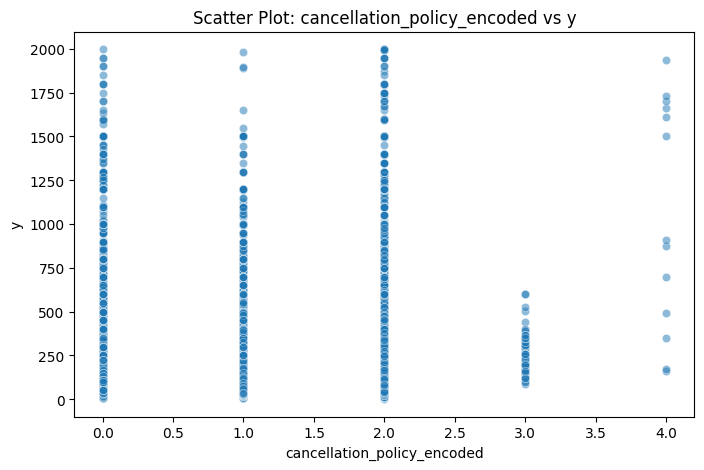

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 数値変数のみを抽出
numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = numeric_cols.drop('y')  # 目的変数を除外

# 数値変数と目的変数の関係を可視化する関数
def plot_scatter_for_numeric(df, numeric_cols, target_col):
    for col in numeric_cols:
        plt.figure(figsize=(8, 5))
        sns.scatterplot(data=df, x=col, y=target_col, alpha=0.5)
        plt.title(f'Scatter Plot: {col} vs {target_col}')
        plt.xlabel(col)
        plt.ylabel(target_col)
        plt.show()

# 関数の適用
plot_scatter_for_numeric(train, numeric_cols, 'y')
